# CDS 492 Data Exploration

## Data Cleaning

For my first prototype, I want to mainly look at data coming from the general dataset. Then I want to incorporate new information from the user reviews dataset afterwords in order to improve my results. 

In [69]:
# Loading data
import pandas as pd
import numpy as np

df = pd.read_csv("googleplaystore.csv")

df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [70]:
# Checking to see how the data needs to be cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Looking at the data so far, I can see that just about every column is counted as an object even if the data represented is numerical. The obvious columns that need to change are "reviews", "size", "installs", and "price". The following changes will be made:
1) Reviews will be converted to type int since it describes the number of reviews
2) Size will be converted to type float and will be standardized to represent all app sizes in megabytes
3) Installs will have the + and , characters removed and be converted to type int
4) Price will have the $ symbol removed and be converted to type float
5) Last Updated will be converted to type datetime for ease of analysis

Additionally, all columns will null objects will be removed, since it will be easier to fit complete data rows into a model later.

In [71]:
df = df.dropna()

df['Reviews'] = df['Reviews'].astype(int)

# Converts all sizes to megabytes
for row in df.index:
    # megabytes
    if 'M' in df.loc[row, 'Size']:
        df.loc[row, 'Size'] = float(df.loc[row, 'Size'].replace('M',''))
    # converts kilobytes to megabytes
    elif 'k' in df.loc[row, 'Size']:
        df.loc[row, 'Size'] = float(df.loc[row, 'Size'].replace('k','')) / 1000
    # converts gigabytes
    elif 'G' in df.loc[row, 'Size']:
        df.loc[row, 'Size'] = float(df.loc[row, 'Size'].replace('G','')) * 1000
    # removes rows with no set size
    else:
        df.loc[row, 'Size'] = None
df = df.dropna()
df['Size'] = df['Size'].astype(float)

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex = 'TRUE').astype(int)

df['Price'] = df['Price'].str.replace('$', '', regex = 'TRUE').astype(float)

df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             7723 non-null   object        
 1   Category        7723 non-null   object        
 2   Rating          7723 non-null   float64       
 3   Reviews         7723 non-null   int32         
 4   Size            7723 non-null   float64       
 5   Installs        7723 non-null   int32         
 6   Type            7723 non-null   object        
 7   Price           7723 non-null   float64       
 8   Content Rating  7723 non-null   object        
 9   Genres          7723 non-null   object        
 10  Last Updated    7723 non-null   datetime64[ns]
 11  Current Ver     7723 non-null   object        
 12  Android Ver     7723 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 784.4+ KB


In [74]:
# Saving data to csv for future use
df.to_csv('googlePS_cleaned.csv', index=False)

After cleaning, we can see that the dataset has 7723 rows remaining that had valid entries in all columns. From here, we can now load the data from our new cleaned spreadsheet for analysis. However, the Last Updated column will still need to be converted back to type datetime.

## Data Exploration

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("googlePS_cleaned.csv")
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [59]:
print('Summary Statistics')
print(df.describe())

Summary Statistics
            Rating       Reviews         Size      Installs        Price
count  7723.000000  7.723000e+03  7723.000000  7.723000e+03  7723.000000
mean      4.173935  2.948983e+05    22.970456  8.424070e+06     1.128169
std       0.544638  1.863933e+06    23.449629  5.015742e+07    17.408036
min       1.000000  1.000000e+00     0.008500  1.000000e+00     0.000000
25%       4.000000  1.075000e+02     5.300000  1.000000e+04     0.000000
50%       4.300000  2.332000e+03    14.000000  1.000000e+05     0.000000
75%       4.500000  3.905300e+04    33.000000  1.000000e+06     0.000000
max       5.000000  4.489389e+07   100.000000  1.000000e+09   400.000000


The first thing I want to check is to see if there is a correlation between any of the numeric variables. Below we can see that there isn't much correlation between any of these variables. The best correlation we can see exists between the Reviews and Installs of the apps, so those might be good predictors for what we determine success to be.

In [3]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079819,0.083640,0.052693,-0.021320
Reviews,0.079819,1.000000,0.240382,0.626187,-0.010184
Size,0.083640,0.240382,1.000000,0.162707,-0.026272
Installs,0.052693,0.626187,0.162707,1.000000,-0.010852
Price,-0.021320,-0.010184,-0.026272,-0.010852,1.000000


Since there are no direct correlations to rating, I want to makes boxplots of the categorical data with respect to the rating of the apps. These categories are Category, Type, Content Rating, Genres, Current Ver, and Android Ver.

In [37]:
print('Category unique values:', len(df['Category'].value_counts()))
print('Type unique values:', len(df['Type'].value_counts()))
print('Content Rating unique values:', len(df['Content Rating'].value_counts()))
print('Genres unique values:', len(df['Genres'].value_counts()))
print('Current Ver unique values:', len(df['Current Ver'].value_counts()))
print('Android Ver unique values:', len(df['Android Ver'].value_counts()))

Category unique values 33
Type unique values 2
Content Rating unique values 6
Genres unique values 112
Current Ver unique values 2519
Android Ver unique values 31


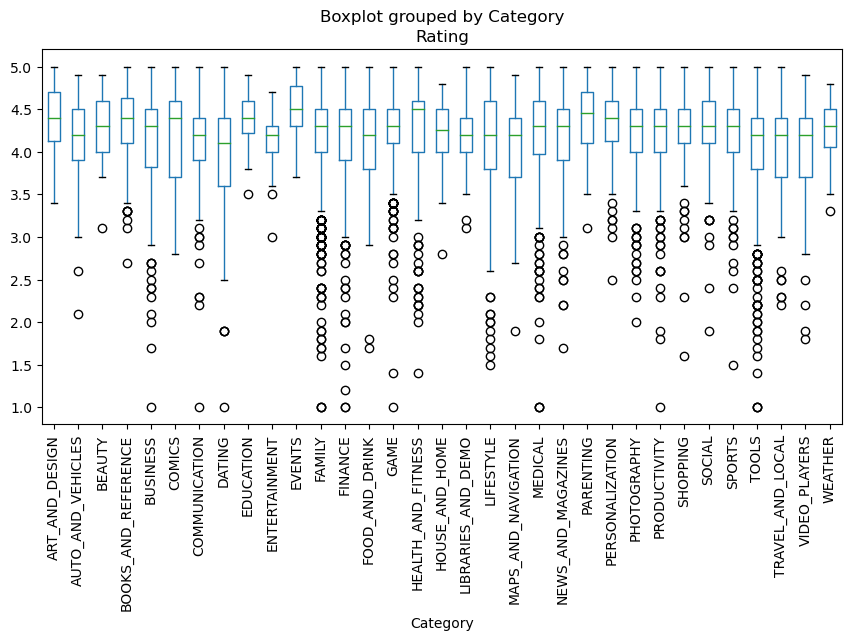

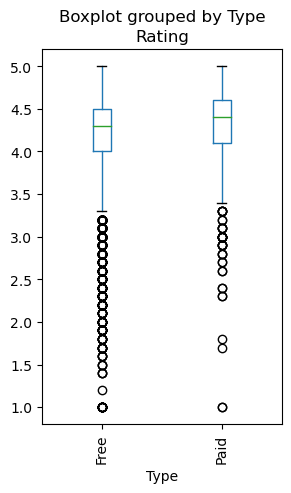

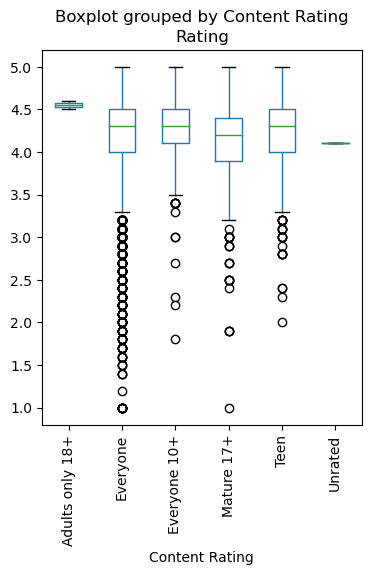

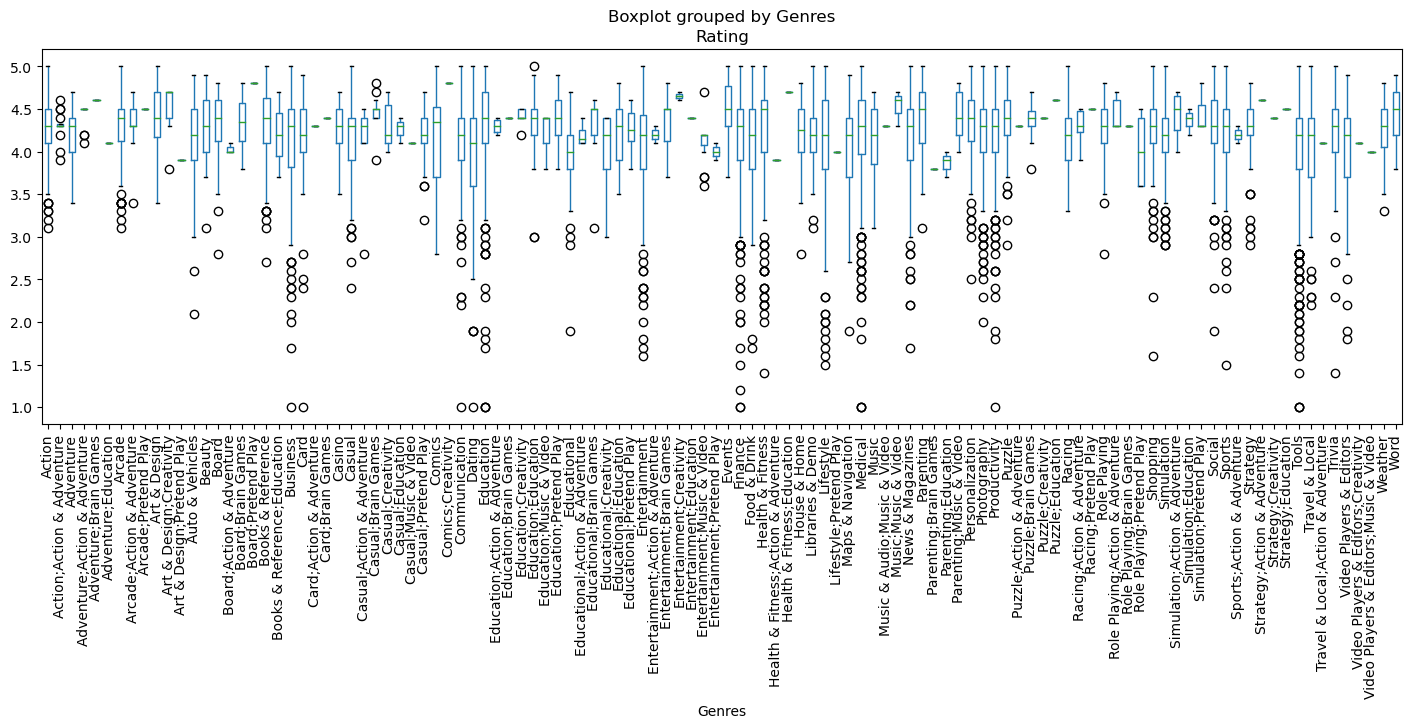

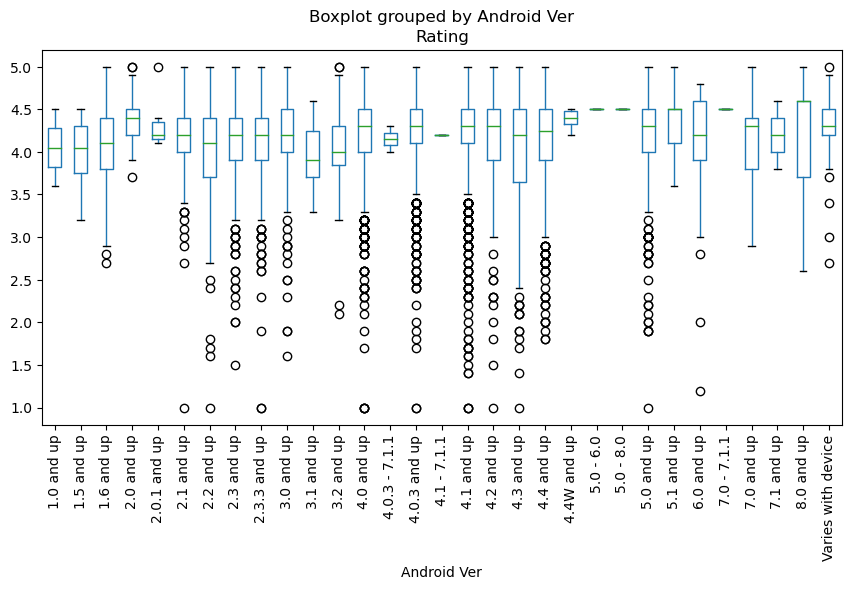

In [52]:
import matplotlib.pyplot as plt

# Boxplot of ratings by categories
plt.rcParams['figure.figsize'] = [10, 5]
df.boxplot('Rating', by='Category', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of ratings by type (free or paid apps)
plt.rcParams['figure.figsize'] = [3, 5]
df.boxplot('Rating', by='Type', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of ratings by content ratings
plt.rcParams['figure.figsize'] = [4, 5]
df.boxplot('Rating', by='Content Rating', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of ratings by genres
plt.rcParams['figure.figsize'] = [17, 5]
df.boxplot('Rating', by='Genres', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of ratings by Android version
plt.rcParams['figure.figsize'] = [10, 5]
df.boxplot('Rating', by='Android Ver', rot = 90)
plt.grid(visible=False)
plt.show()

Here we can see that there is some variation in the average ratings of the apps when looking at the average ratings across the different categories. For many of these categories, except for Current Ver and probably Genres, these variables could possibly be encoded so that a model can be built around. The averate ratings of the apps tends to remain around 4.2 for all apps though, so it is likely that the first version of the model will only have minor success if any in predicting future performance of the apps. Below, we can also see that the number of installs varies too much for us to be able to draw meaningful conclusions, due to the presence of extraordinary outliers.

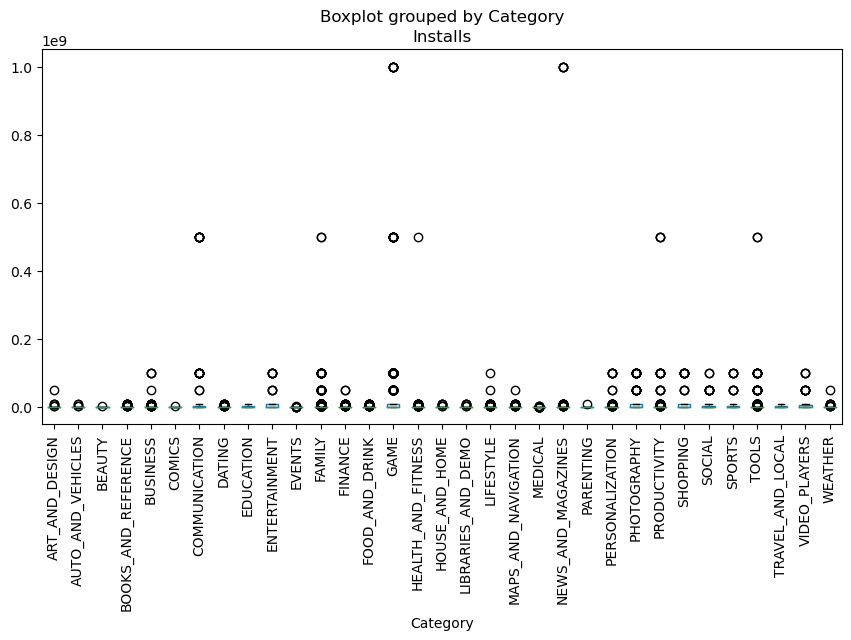

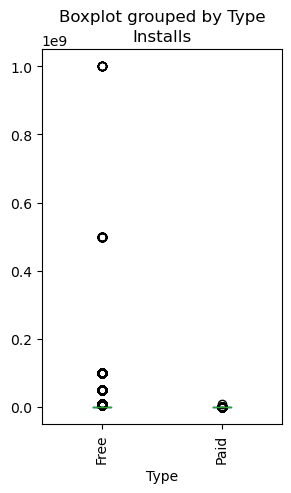

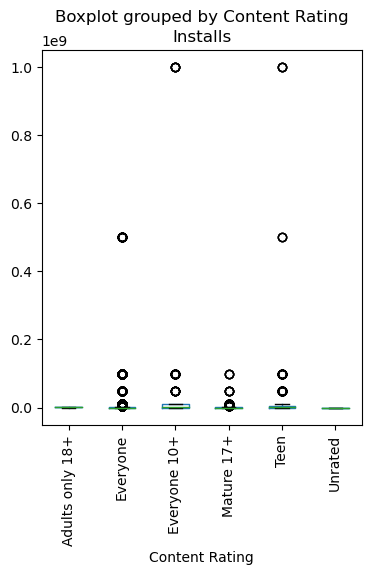

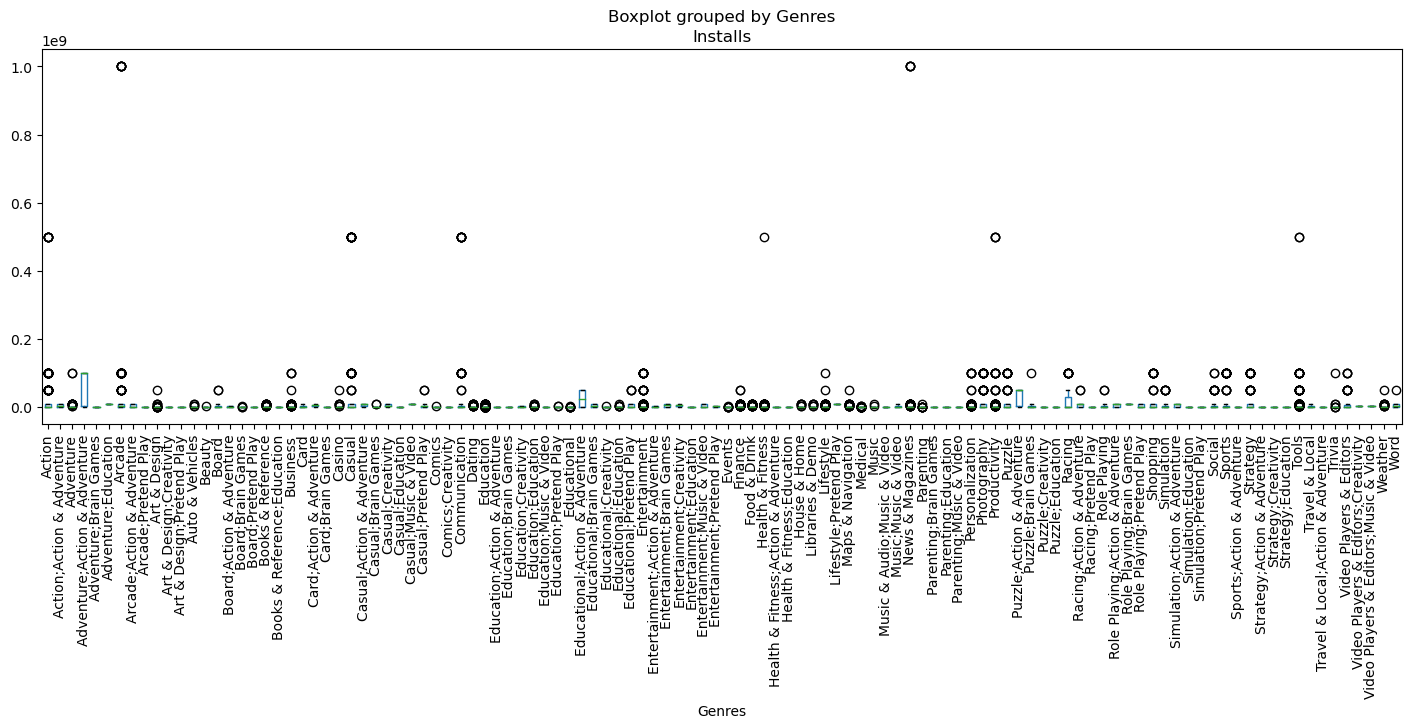

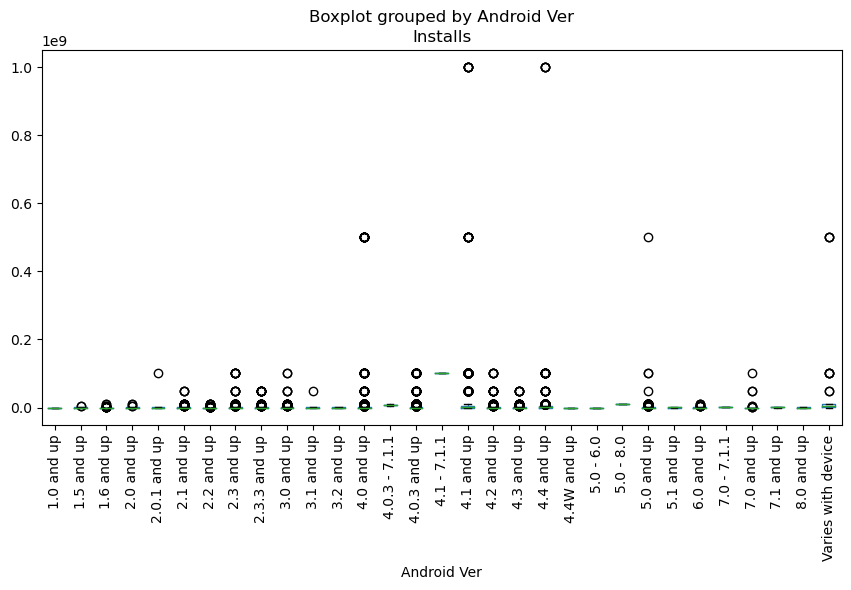

In [58]:
# Boxplot of installs by categories
plt.rcParams['figure.figsize'] = [10, 5]
df.boxplot('Installs', by='Category', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of installs by type (free or paid apps)
plt.rcParams['figure.figsize'] = [3, 5]
df.boxplot('Installs', by='Type', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of intsalls by content ratings
plt.rcParams['figure.figsize'] = [4, 5]
df.boxplot('Installs', by='Content Rating', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of installs by genres
plt.rcParams['figure.figsize'] = [17, 5]
df.boxplot('Installs', by='Genres', rot = 90)
plt.grid(visible=False)
plt.show()

# Boxplot of installs by Android version
plt.rcParams['figure.figsize'] = [10, 5]
df.boxplot('Installs', by='Android Ver', rot = 90)
plt.grid(visible=False)
plt.show()